<a href="https://colab.research.google.com/github/soleildayana/Planetary-Sciences/blob/main/TrabajoFinalCPlanetarias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Final Ciencias Planetarias 2025-1

## Análisis de Zonas Habitables para Sistemas Planetarios
**Soleil Dayana Niño Murcia**

Agosto 2025






Este notebook presenta un estudio sobre las **zonas habitables** de 10 sistemas estelares seleccionados, utilizando los criterios de habitabilidad de Kopparapu et al. (2013/2014).

Se analizarán y visualizarán las distancias orbitales que definen las zonas donde el agua líquida podría existir en la superficie de un planeta, considerando diferentes escenarios (optimista y conservador).

Para explorar la interfaz interactiva, se le recomienda ir directo a la subsección "Versión interactiva final".

El notebook incluye:

- Carga de datos de parámetros estelares y planetarios confirmados.
- Implementación de las ecuaciones y coeficientes de Kopparapu.
- Visualizaciones de las zonas habitables para sistemas individuales (ej. Proxima Centauri, nuestro Sistema Solar).
- Análisis gráfico de cómo varían las zonas habitables en función de la luminosidad y la temperatura estelar.
- Una herramienta interactiva para explorar la ubicación de las zonas habitables modificando los parámetros de una estrella hipotética.
- Un resumen de la habitabilidad potencial de los planetas confirmados en los sistemas estudiados.

El objetivo es comprender la influencia de las propiedades estelares en la ubicación de la zona habitable y evaluar la habitabilidad potencial de planetas conocidos dentro de estos sistemas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [ ]:
!pip install plotly

## Lote de datos

In [ ]:
# Lista de 10 estrellas para el estudio
estrellas = [
    "Proxima Centauri",      # La estrella más cercana, con planeta en zona habitable
    "TRAPPIST-1",            # Sistema con 7 planetas terrestres, varios en zona habitable
    "LHS 1140",              # Enana roja con planeta potencialmente habitable
    "Teegarden's Star",      # Estrella con dos planetas en zona habitable
    "GJ 667 C",              # Componente de sistema triple con planeta en zona habitable
    "K2-18",                 # Estrella con planeta en zona habitable con vapor de agua
    "Kepler-186",            # Primera estrella con planeta de tamaño terrestre en zona habitable
    "GJ 1061",               # Sistema con múltiples planetas, uno en zona habitable conservadora
    "TOI-700",               # Sistema con planeta en zona habitable (TESS)
    "GJ 357"                 # Sistema con planeta en zona habitable
]

In [ ]:
# Parámetros físicos estelares
datos_estrellas = [
    {
        'nombre': 'Proxima Centauri',
        'masa': 0.122, # Masas solares
        'radio': 0.141, # Radios solares
        'temperatura_efectiva': 2900, # Kelvin
        'luminosidad': 0.0017, # Luminosidad solar
        'edad': 4.85,
        'distancia_pc': 1.295 # Parsec
    },
    {
        'nombre': 'TRAPPIST-1',
        'masa': 0.089,
        'radio': 0.114,
        'temperatura_efectiva': 2566,
        'luminosidad': 0.0005,
        'edad': 7.6,
        'distancia_pc': 12.43
    },
    {
        'nombre': 'LHS 1140',
        'masa': 0.179,
        'radio': 0.186,
        'temperatura_efectiva': 3216,
        'luminosidad': 0.0028,
        'edad': 5.0,
        'distancia_pc': 14.99
    },
    {
        'nombre': "Teegarden's Star",
        'masa': 0.089,
        'radio': 0.107,
        'temperatura_efectiva': 2900,
        'luminosidad': 0.0007,
        'edad': 8.0,
        'distancia_pc': 12.50
    },
    {
        'nombre': 'GJ 667 C',
        'masa': 0.33,
        'radio': 0.33,
        'temperatura_efectiva': 3700,
        'luminosidad': 0.0137,
        'edad': 2.0,
        'distancia_pc': 6.84
    },
    {
        'nombre': 'K2-18',
        'masa': 0.36,
        'radio': 0.41,
        'temperatura_efectiva': 3503,
        'luminosidad': 0.023,
        'edad': 2.0,
        'distancia_pc': 38.0
    },
    {
        'nombre': 'Kepler-186',
        'masa': 0.54,
        'radio': 0.52,
        'temperatura_efectiva': 3788,
        'luminosidad': 0.055,
        'edad': 4.0,
        'distancia_pc': 151.0
    },
    {
        'nombre': 'GJ 1061',
        'masa': 0.113,
        'radio': 0.156,
        'temperatura_efectiva': 2953,
        'luminosidad': 0.0016,
        'edad': 7.0,
        'distancia_pc': 3.67
    },
    {
        'nombre': 'TOI-700',
        'masa': 0.415,
        'radio': 0.424,
        'temperatura_efectiva': 3480,
        'luminosidad': 0.023,
        'edad': 1.5,
        'distancia_pc': 31.1
    },
    {
        'nombre': 'GJ 357',
        'masa': 0.34,
        'radio': 0.34,
        'temperatura_efectiva': 3505,
        'luminosidad': 0.014,
        'edad': 5.0,
        'distancia_pc': 9.44
    }
]

# Crear DataFrame
df_estrellas = pd.DataFrame(datos_estrellas)
df_estrellas

,nombre,masa,radio,temperatura_efectiva,luminosidad,edad,distancia_pc
0,Proxima Centauri,0.122,0.141,2900,0.0017,4.85,1.295
1,TRAPPIST-1,0.089,0.114,2566,0.0005,7.60,12.430
2,LHS 1140,0.179,0.186,3216,0.0028,5.00,14.990
3,Teegarden's Star,0.089,0.107,2900,0.0007,8.00,12.500
4,GJ 667 C,0.330,0.330,3700,0.0137,2.00,6.840
5,K2-18,0.360,0.410,3503,0.0230,2.00,38.000
6,Kepler-186,0.540,0.520,3788,0.0550,4.00,151.000
7,GJ 1061,0.113,0.156,2953,0.0016,7.00,3.670
8,TOI-700,0.415,0.424,3480,0.0230,1.50,31.100
9,GJ 357,0.340,0.340,3505,0.0140,5.00,9.440


In [ ]:
# Datos de planetas confirmados para cada estrella, tomados del exoplanet archive
# Para cada sistema se comenta la literatura prinipal fuente
datos_planetas = {
    'Proxima Centauri': [   # Suárez Mascareño et al. 2025
        {'nombre': 'Proxima Cen b', 'distancia_au': 0.0485, 'tipo': 'Terrestre'},
        {'nombre': 'Proxima Cen c', 'distancia_au': 1.49, 'tipo': 'Super-Tierra/Neptuno'},
        {'nombre': 'Proxima Cen d', 'distancia_au': 0.029, 'tipo': 'Terrestre'}
    ],
    'TRAPPIST-1': [ #	Agol et al. 2021
        {'nombre': 'TRAPPIST-1b', 'distancia_au': 0.0115, 'tipo': 'Terrestre'},
        {'nombre': 'TRAPPIST-1c', 'distancia_au': 0.0158, 'tipo': 'Terrestre'},
        {'nombre': 'TRAPPIST-1d', 'distancia_au': 0.0223, 'tipo': 'Terrestre'},
        {'nombre': 'TRAPPIST-1e', 'distancia_au': 0.0292, 'tipo': 'Terrestre'},
        {'nombre': 'TRAPPIST-1f', 'distancia_au': 0.0385, 'tipo': 'Terrestre'},
        {'nombre': 'TRAPPIST-1g', 'distancia_au': 0.0469, 'tipo': 'Terrestre'},
        {'nombre': 'TRAPPIST-1h', 'distancia_au': 0.0619, 'tipo': 'Terrestre'}
    ],
    'LHS 1140': [ # Cadieux et al. 2024
        {'nombre': 'LHS 1140b', 'distancia_au': 0.0946, 'tipo': 'Super-Tierra'},
        {'nombre': 'LHS 1140c', 'distancia_au': 0.027, 'tipo': 'Super-Tierra'},
    ],
    "Teegarden's Star": [ #Dreizler et al. 2024
        {'nombre': 'Teegarden\'s Star b', 'distancia_au': 0.0259, 'tipo': 'Terrestre'},
        {'nombre': 'Teegarden\'s Star c', 'distancia_au': 0.0455, 'tipo': 'Terrestre'},
        {'nombre': 'Teegarden\'s Star d', 'distancia_au': 0.0791, 'tipo': 'Terrestre'},
    ],
    'GJ 667 C': [ #	Anglada-Escude et al. 2013
        {'nombre': 'GJ 667 Cc', 'distancia_au': 0.125, 'tipo': 'Super-Tierra'}, # 	Bonfils et al. 2013
        {'nombre': 'GJ 667 Ce', 'distancia_au': 0.213, 'tipo': 'Super-Tierra'},
        {'nombre': 'GJ 667 Cf', 'distancia_au': 0.156, 'tipo': 'Super-Tierra'},
        {'nombre': 'GJ 667 Cb', 'distancia_au': 0.05, 'tipo': 'Super-Tierra'},
        {'nombre': 'GJ 667 Cd', 'distancia_au': 0.163, 'tipo': 'Super-Tierra'},
    ],
    'K2-18': [ 	#Sarkis et al. 2018
        {'nombre': 'K2-18b', 'distancia_au': 0.143, 'tipo': 'Mini-Neptuno'},
        {'nombre': 'K2-18c', 'distancia_au': 0.06, 'tipo': 'Mini-Neptuno'}
    ],
    'Kepler-186': [ # Rowe et al. 2014
        {'nombre': 'Kepler-186f', 'distancia_au': 0.432, 'tipo': 'Terrestre'}, # El más relevante para ZH
        {'nombre': 'Kepler-186b', 'distancia_au': 0.0343, 'tipo': 'Terrestre'},
        {'nombre': 'Kepler-186c', 'distancia_au': 0.045, 'tipo': 'Terrestre'},
        {'nombre': 'Kepler-186d', 'distancia_au': 0.078, 'tipo': 'Terrestre'},
        {'nombre': 'Kepler-186e', 'distancia_au': 0.11, 'tipo': 'Terrestre'}
    ],
    'GJ 1061': [ # Dreizler et al. 2020
        {'nombre': 'GJ 1061 b', 'distancia_au': 0.021, 'tipo': 'Terrestre'},
        {'nombre': 'GJ 1061 c', 'distancia_au': 0.035, 'tipo': 'Super-Tierra'},
        {'nombre': 'GJ 1061 d', 'distancia_au': 0.054, 'tipo': 'Terrestre'}

    ],
    'TOI-700': [ # 	Gilbert et al. 2020
        {'nombre': 'TOI-700 b', 'distancia_au': 0.0677, 'tipo': 'Terrestre'},
        {'nombre': 'TOI-700 c', 'distancia_au': 0.0929, 'tipo': 'Super-Tierra'},
        {'nombre': 'TOI-700 e', 'distancia_au': 0.134, 'tipo': 'Terrestre'},
        {'nombre': 'TOI-700 d', 'distancia_au': 0.1633, 'tipo': 'Terrestre'},


    ],
    'GJ 357': [ # 	Luque et al. 2019
        {'nombre': 'GJ 357 b', 'distancia_au': 0.036, 'tipo': 'Terrestre'},
        {'nombre': 'GJ 357 c', 'distancia_au': 0.061, 'tipo': 'Super-Tierra'},
        {'nombre': 'GJ 357 d', 'distancia_au': 0.204, 'tipo': 'Mini-neptuno'},

    ]
}

## Ecuaciones y coeficientes de Kopparapu




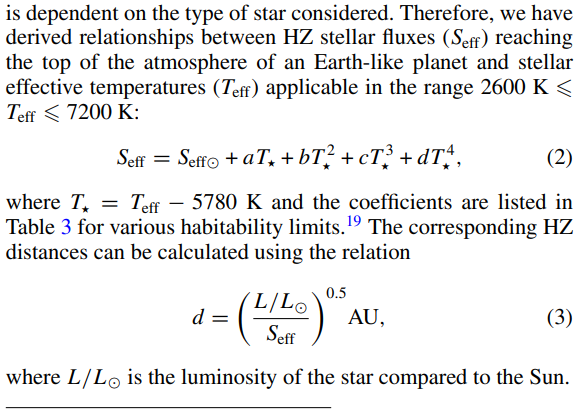



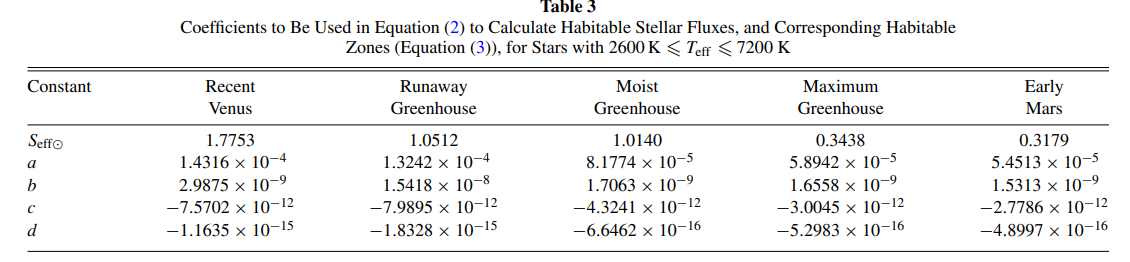

In [ ]:
# Coeficientes exactos de Kopparapu et al. 2013/2014 para cada criterio
COEFICIENTES_HZ = {
    'recent_venus': {
        'S_eff_sun': 1.7753,
        'a': 1.4316e-4,
        'b': 2.9875e-9,
        'c': -7.5702e-12,
        'd': -1.1635e-15
    },
    'runaway_greenhouse': {
        'S_eff_sun': 1.0512,
        'a': 1.3242e-4,
        'b': 1.5418e-8,
        'c': -7.9895e-12,
        'd': -1.8328e-15
    },
    'moist_greenhouse': {
        'S_eff_sun': 1.0140,
        'a': 8.1774e-5,
        'b': 1.7063e-9,
        'c': -4.3241e-12,
        'd': -6.6462e-16
    },
    'maximum_greenhouse': {
        'S_eff_sun': 0.3438,
        'a': 5.8942e-5,
        'b': 1.6558e-9,
        'c': -3.0045e-12,
        'd': -5.2983e-16
    },
    'early_mars': {
        'S_eff_sun': 0.3179,
        'a': 5.4513e-5,
        'b': 1.5313e-9,
        'c': -2.7786e-12,
        'd': -4.8997e-16
    }
}

## Funciones:


*   Flujo estelar efectivo
*   Distancia a zona habitable según criterio individual y para todos los criterios en conjunto




In [ ]:
def calcular_S_eff(T_eff, criterio):
    """
    Calcula el flujo estelar efectivo para la zona habitable según Kopparapu et al.

    Parámetros:
    T_eff : float
        Temperatura efectiva de la estrella en Kelvin
    criterio : str
        Criterio de zona habitable: 'recent_venus', 'runaway_greenhouse',
        'moist_greenhouse', 'maximum_greenhouse', 'early_mars'

    Retorna:
    S_eff : float
        Flujo estelar efectivo (en unidades solares)
    """
    if criterio not in COEFICIENTES_HZ:
        raise ValueError(f"Criterio '{criterio}' no válido. Opciones: {list(COEFICIENTES_HZ.keys())}")

    coef = COEFICIENTES_HZ[criterio]
    T_star = T_eff - 5780.0

    S_eff = (coef['S_eff_sun'] +
             coef['a'] * T_star +
             coef['b'] * T_star**2 +
             coef['c'] * T_star**3 +
             coef['d'] * T_star**4)

    return max(S_eff, 0)  # Asegurar valor no negativo

def calcular_distancia_hz(luminosidad, T_eff, criterio):
    """
    Calcula la distancia de zona habitable para un criterio específico

    Parámetros:
    luminosidad : float
        Luminosidad estelar en unidades solares (L/L_sun)
    T_eff : float
        Temperatura efectiva de la estrella en Kelvin
    criterio : str
        Criterio de zona habitable

    Retorna:
    distancia : float
        Distancia en unidades astronómicas (AU)
    """
    S_eff = calcular_S_eff(T_eff, criterio)

    if S_eff <= 0:
        return np.nan

    distancia = np.sqrt(luminosidad / S_eff)
    return distancia

def calcular_todas_zonas_habitables(luminosidad, T_eff):
    """
    Calcula todas las distancias de zona habitable para una estrella

    Parámetros:
    luminosidad : float
        Luminosidad estelar en unidades solares
    T_eff : float
        Temperatura efectiva de la estrella en Kelvin

    Retorna:
    dict : Diccionario con distancias para todos los criterios
    """
    resultados = {}

    for criterio in COEFICIENTES_HZ.keys():
        distancia = calcular_distancia_hz(luminosidad, T_eff, criterio)
        resultados[criterio] = distancia

    return resultados

In [ ]:
# Funciones individuales para cada criterio (para facilitar el uso)
def hz_recent_venus(luminosidad, T_eff):
    """Calcula la zona habitable según criterio 'Recent Venus'"""
    return calcular_distancia_hz(luminosidad, T_eff, 'recent_venus')

def hz_runaway_greenhouse(luminosidad, T_eff):
    """Calcula la zona habitable según criterio 'Runaway Greenhouse'"""
    return calcular_distancia_hz(luminosidad, T_eff, 'runaway_greenhouse')

def hz_moist_greenhouse(luminosidad, T_eff):
    """Calcula la zona habitable según criterio 'Moist Greenhouse'"""
    return calcular_distancia_hz(luminosidad, T_eff, 'moist_greenhouse')

def hz_maximum_greenhouse(luminosidad, T_eff):
    """Calcula la zona habitable según criterio 'Maximum Greenhouse'"""
    return calcular_distancia_hz(luminosidad, T_eff, 'maximum_greenhouse')

def hz_early_mars(luminosidad, T_eff):
    """Calcula la zona habitable según criterio 'Early Mars'"""
    return calcular_distancia_hz(luminosidad, T_eff, 'early_mars')

In [ ]:
# Función para aplicar a nuestro DataFrame de estrellas
def agregar_zonas_habitables(df):
    """
    Agrega las zonas habitables a un DataFrame de estrellas

    Parámetros:
    df : DataFrame
        DataFrame con columnas 'luminosidad' y 'temperatura_efectiva'

    Retorna:
    DataFrame : DataFrame con columnas adicionales para cada zona habitable
    """
    df_resultado = df.copy()

    for criterio in COEFICIENTES_HZ.keys():
        col_name = f'hz_{criterio}'
        df_resultado[col_name] = df_resultado.apply(
            lambda row: calcular_distancia_hz(row['luminosidad'], row['temperatura_efectiva'], criterio),
            axis=1
        )

    return df_resultado

In [ ]:
df_estrellas = pd.DataFrame(datos_estrellas)
df_estrellas

,nombre,masa,radio,temperatura_efectiva,luminosidad,edad,distancia_pc
0,Proxima Centauri,0.122,0.141,2900,0.0017,4.85,1.295
1,TRAPPIST-1,0.089,0.114,2566,0.0005,7.60,12.430
2,LHS 1140,0.179,0.186,3216,0.0028,5.00,14.990
3,Teegarden's Star,0.089,0.107,2900,0.0007,8.00,12.500
4,GJ 667 C,0.330,0.330,3700,0.0137,2.00,6.840
5,K2-18,0.360,0.410,3503,0.0230,2.00,38.000
6,Kepler-186,0.540,0.520,3788,0.0550,4.00,151.000
7,GJ 1061,0.113,0.156,2953,0.0016,7.00,3.670
8,TOI-700,0.415,0.424,3480,0.0230,1.50,31.100
9,GJ 357,0.340,0.340,3505,0.0140,5.00,9.440


## Estimación de las ZH

In [ ]:
df_con_hz = agregar_zonas_habitables(df_estrellas)
df_con_hz
print("ESTRELLAS Y ZONAS HABITABLES:")

columnas_mostrar = ['nombre'] + [f'hz_{c}' for c in COEFICIENTES_HZ.keys()]
df_con_hz[columnas_mostrar]

ESTRELLAS Y ZONAS HABITABLES:


,nombre,hz_recent_venus,hz_runaway_greenhouse,hz_moist_greenhouse,hz_maximum_greenhouse,hz_early_mars
0,Proxima Centauri,0.033794,0.044397,0.044716,0.087292,0.090783
1,TRAPPIST-1,0.018423,0.024189,0.024377,0.048260,0.050191
2,LHS 1140,0.043130,0.056780,0.057069,0.110024,0.114424
3,Teegarden's Star,0.021685,0.028489,0.028694,0.056014,0.058255
4,GJ 667 C,0.094417,0.124768,0.124931,0.236237,0.245683
5,K2-18,0.122893,0.162159,0.162610,0.309956,0.322351
6,Kepler-186,0.188768,0.249590,0.249774,0.470584,0.489398
7,GJ 1061,0.032756,0.043045,0.043343,0.084432,0.087809
8,TOI-700,0.122955,0.162211,0.162691,0.310397,0.322810
9,GJ 357,0.095876,0.126511,0.126861,0.241795,0.251464


Para confirmar los resultados de este ejemplo, investigué las zonas habitables de Proxima Centauri con estos criterios en [exoplanetkyoto](https://www.exoplanetkyoto.org/exohtml/Proxima_Centauri_b.html)

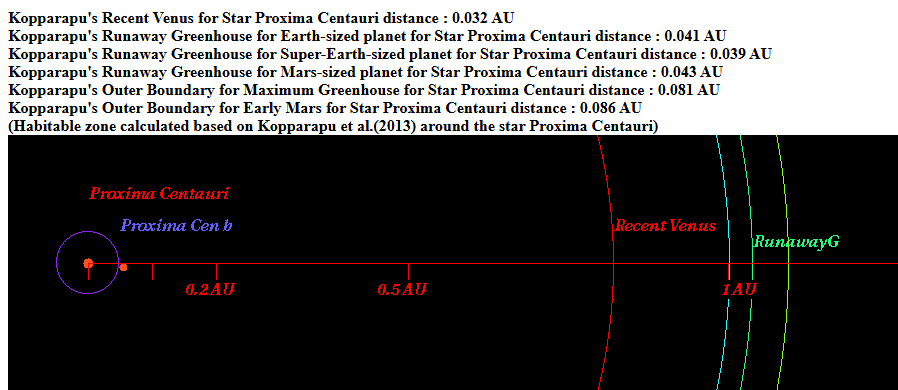

Los valores son consistentes con la fuente.


In [ ]:
# Crear un DataFrame para los anchos de las zonas habitables
df_anchos_hz = df_con_hz[['nombre']].copy()

# Calcular el ancho de las zonas habitables en AU
df_anchos_hz['ancho_zh_conservadora_au'] = df_con_hz['hz_maximum_greenhouse'] - df_con_hz['hz_runaway_greenhouse']
df_anchos_hz['ancho_zh_optimista_au'] = df_con_hz['hz_early_mars'] - df_con_hz['hz_recent_venus']

# Convertir los anchos a kilómetros (1 AU ≈ 149.6 millones de km)
AU_TO_KM = 149.5978707e6

df_anchos_hz['ancho_zh_conservadora_km'] = df_anchos_hz['ancho_zh_conservadora_au'] * AU_TO_KM
df_anchos_hz['ancho_zh_optimista_km'] = df_anchos_hz['ancho_zh_optimista_au'] * AU_TO_KM

print("ANCHOS DE ZONAS HABITABLES:")
print("="*30)
display(df_anchos_hz)

ANCHOS DE ZONAS HABITABLES:


,nombre,ancho_zh_conservadora_au,ancho_zh_optimista_au,ancho_zh_conservadora_km,ancho_zh_optimista_km
0,Proxima Centauri,0.042895,0.056989,6.417005e+06,8.525485e+06
1,TRAPPIST-1,0.024071,0.031768,3.601041e+06,4.752489e+06
2,LHS 1140,0.053244,0.071294,7.965210e+06,1.066544e+07
3,Teegarden's Star,0.027525,0.036569,4.117721e+06,5.470709e+06
4,GJ 667 C,0.111469,0.151265,1.667554e+07,2.262900e+07
5,K2-18,0.147797,0.199458,2.211014e+07,2.983847e+07
6,Kepler-186,0.220994,0.300630,3.306017e+07,4.497368e+07
7,GJ 1061,0.041386,0.055053,6.191323e+06,8.235740e+06
8,TOI-700,0.148187,0.199855,2.216840e+07,2.989789e+07
9,GJ 357,0.115283,0.155588,1.724614e+07,2.327562e+07


## Gráfica individual con superposición de criterios

In [ ]:
def visualizar_zonas_habitables_proxima():
    """
    Visualización de las zonas habitables de Proxima Centauri
    como circunferencias concéntricas en fondo negro
    """
    # Datos de Proxima Centauri
    T_eff_proxima = 3042
    L_proxima = 0.0017

    # Calcular todas las zonas habitables
    zonas = {}
    for criterio in COEFICIENTES_HZ.keys():
        distancia = calcular_distancia_hz(L_proxima, T_eff_proxima, criterio)
        zonas[criterio] = distancia

    # Configurar la figura
    fig, ax = plt.subplots(figsize=(12, 12), facecolor='black')
    ax.set_facecolor('black')

    # Dibujar la estrella en el centro
    ax.scatter(0, 0, s=500, color='yellow', marker='o', label='Proxima Centauri')
    ax.text(0, 0.005, 'Proxima Centauri', color='white',
            ha='center', va='bottom', fontsize=10)

    # Colores para las diferentes zonas habitables
    colores = {
        'recent_venus': 'red',
        'runaway_greenhouse': 'orange',
        'moist_greenhouse': 'lime',
        'maximum_greenhouse': 'cyan',
        'early_mars': 'purple'
    }

    # Nombres para mostrar
    nombres_display = {
        'recent_venus': 'Recent Venus',
        'runaway_greenhouse': 'Runaway Greenhouse',
        'moist_greenhouse': 'Moist Greenhouse',
        'maximum_greenhouse': 'Maximum Greenhouse',
        'early_mars': 'Early Mars'
    }

    # Ángulos para distribuir las etiquetas (en radianes)
    angulos_etiquetas = {
        'recent_venus': np.pi/6,        # 30°
        'runaway_greenhouse': np.pi/3,  # 60°
        'moist_greenhouse': 2*np.pi/3,  # 120°
        'maximum_greenhouse': 5*np.pi/6, # 150°
        'early_mars': 4*np.pi/3         # 240°
    }

    # Dibujar las zonas habitables como circunferencias
    for criterio, distancia in zonas.items():
        if not np.isnan(distancia):
            # Crear circunferencia
            circle = plt.Circle((0, 0), distancia, fill=False,
                               color=colores[criterio], linewidth=2,
                               linestyle='-', alpha=0.8,
                               label=nombres_display[criterio])
            ax.add_patch(circle)

            # Obtener coordenadas polares para la etiqueta
            angulo = angulos_etiquetas[criterio]
            x_text = distancia * np.cos(angulo)
            y_text = distancia * np.sin(angulo)

            # Añadir etiqueta en posición angular
            ax.text(x_text, y_text,
                   f'{nombres_display[criterio]}\n{distancia:.3f} UA',
                   color=colores[criterio], fontsize=9,
                   ha='center', va='center',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='black',
                            alpha=0.7, edgecolor=colores[criterio]))

    # Dibujar la posición de Proxima Centauri b (aproximadamente 0.0485 UA)
    planeta_distancia = 0.0485
    ax.scatter(planeta_distancia, 0, s=100, color='blue', marker='o', label='Proxima Cen b')
    ax.text(planeta_distancia + 0.002, 0.002, 'Proxima Cen b\n0.0485 UA',
            color='lightblue', fontsize=9, ha='left', va='bottom',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='black', alpha=0.7, edgecolor='blue'))

    # Configurar los ejes
    max_dist = max(zonas.values()) * 1.1
    ax.set_xlim(-max_dist, max_dist)
    ax.set_ylim(-max_dist, max_dist)
    ax.set_aspect('equal')

    # Añadir grid circular
    ax.grid(True, color='gray', linestyle='--', alpha=0.3)

    # Añadir título y leyenda
    ax.set_title('Distancia orbital a cada criterio para Proxima Centauri',
                color='white', fontsize=14, fontweight='bold')
    ax.legend(facecolor='black', edgecolor='white', labelcolor='white',
              loc='upper right', bbox_to_anchor=(1.15, 1))

    # Información adicional
    info_text = f"""Parámetros Estelares:
Temperatura: {T_eff_proxima} K
Luminosidad: {L_proxima:.6f} L☉
Masa: 0.122 M☉
Radio: 0.154 R☉"""

    ax.text(-max_dist*0.9, max_dist*0.8, info_text,
            color='white', fontsize=10,
            bbox=dict(facecolor='black', alpha=0.7, edgecolor='white'))

    # Añadir coordenadas polares
    ax.set_xlabel('Distancia (UA)', color='white')
    ax.set_ylabel('Distancia (UA)', color='white')
    ax.tick_params(colors='white')

    plt.tight_layout()
    plt.show()

    # También mostrar los valores numéricos
    print("="*60)
    print("DISTANCIAS ORBITALES DE CADA CRITERIO DE HABITABILIDAD PARA PROXIMA CENTAURI")
    print("="*60)
    for criterio, distancia in zonas.items():
        print(f"{nombres_display[criterio]:25s}: {distancia:.6f} UA")

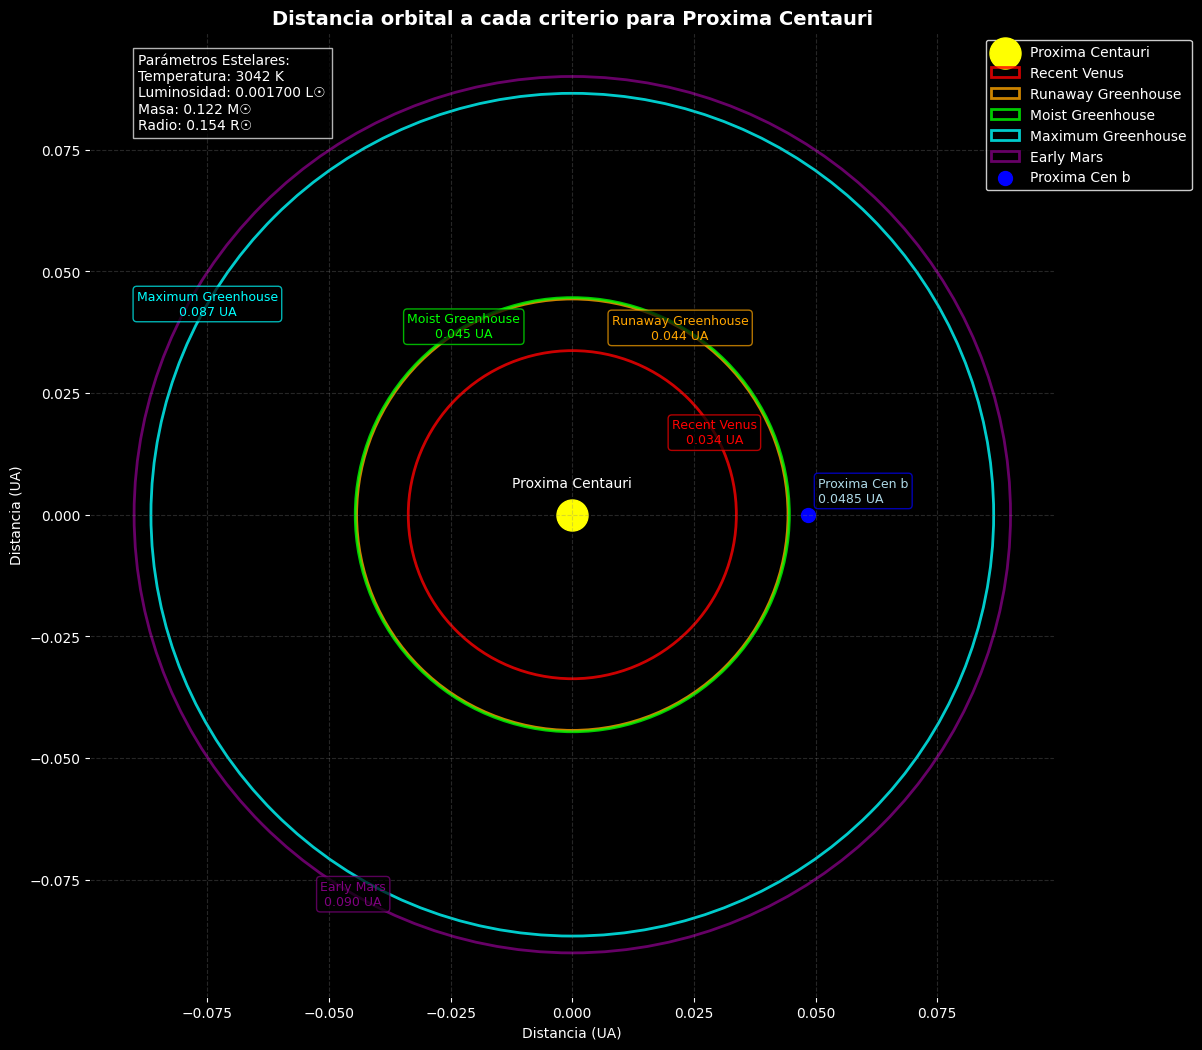

DISTANCIAS ORBITALES DE CADA CRITERIO DE HABITABILIDAD PARA PROXIMA CENTAURI
Recent Venus             : 0.033713 UA
Runaway Greenhouse       : 0.044327 UA
Moist Greenhouse         : 0.044609 UA
Maximum Greenhouse       : 0.086592 UA
Early Mars               : 0.090055 UA


In [ ]:
visualizar_zonas_habitables_proxima()

## Versión interactiva con Plotly

Probando ejemplo exclusivamente para Proxima, agregando a su planeta confirmado Proxima Cen b

In [ ]:
def visualizacion_interactiva_proxima():
    """
    Visualización interactiva con Plotly
    """
    estrella_nombre = 'Proxima Centauri'
    datos_proxima = df_con_hz[df_con_hz['nombre'] == estrella_nombre].iloc[0]

    T_eff_proxima = datos_proxima['temperatura_efectiva']
    L_proxima = datos_proxima['luminosidad']

    # Obtener zonas habitables del DataFrame
    zonas = {}
    for criterio in COEFICIENTES_HZ.keys():
        col_name = f'hz_{criterio}'
        zonas[criterio] = datos_proxima[col_name]

    # Crear figura
    fig = go.Figure()

    # Colores para las zonas
    colores = {
        'recent_venus': 'red',
        'runaway_greenhouse': 'orange',
        'moist_greenhouse': 'green',
        'maximum_greenhouse': 'blue',
        'early_mars': 'purple'
    }

    nombres_display = {
        'recent_venus': 'Recent Venus',
        'runaway_greenhouse': 'Runaway Greenhouse',
        'moist_greenhouse': 'Moist Greenhouse',
        'maximum_greenhouse': 'Maximum Greenhouse',
        'early_mars': 'Early Mars'
    }

    # Añadir la estrella en el centro
    fig.add_trace(go.Scatter(
        x=[0], y=[0],
        mode='markers+text',
        marker=dict(size=20, color='yellow'),
        text=['Proxima Centauri'],
        textposition="top center",
        name="Estrella"
    ))

    # Añadir las zonas habitables como círculos
    for criterio, distancia in zonas.items():
        if not np.isnan(distancia):
            # Crear puntos para el círculo
            theta = np.linspace(0, 2*np.pi, 100)
            x = distancia * np.cos(theta)
            y = distancia * np.sin(theta)

            fig.add_trace(go.Scatter(
                x=x, y=y,
                mode='lines',
                line=dict(color=colores[criterio], width=2),
                name=f"{nombres_display[criterio]} ({distancia:.3f} UA)",
                hoverinfo='name'
            ))

    # Añadir el planeta Proxima Cen b
    planeta_distancia = 0.0485
    fig.add_trace(go.Scatter(
        x=[planeta_distancia], y=[0],
        mode='markers+text',
        marker=dict(size=12, color='blue'),
        text=['Proxima Cen b'],
        textposition="top right",
        name="Proxima Cen b"
    ))

    # Configurar el layout
    max_dist = max(zonas.values()) * 1.1
    fig.update_layout(
        title=dict(
            text='Zonas Habitables de Proxima Centauri',
            x=0.5,
            xanchor='center',
            font=dict(
                size=20,
                color='white',
                family='Arial, sans-serif'
            ),

        ),
        xaxis=dict(
            range=[-max_dist, max_dist],
            title='Distancia (UA)',
            gridcolor='gray',
            zerolinecolor='gray'
        ),
        yaxis=dict(
            range=[-max_dist, max_dist],
            title='Distancia (UA)',
            gridcolor='gray',
            zerolinecolor='gray'
        ),
        plot_bgcolor='black',
        paper_bgcolor='black',
        font=dict(color='white'),
        width=1000,
        height=800,
        showlegend=True
    )

    fig.show()

    return zonas

In [ ]:
zonas_proxima = visualizacion_interactiva_proxima()

## Generalización para todas las estrellas

In [ ]:

def visualizacion_interactiva_estrella(df, estrella_nombre):
    """
    Visualización interactiva con Plotly para una estrella específica

    Parámetros:
    df : DataFrame
        DataFrame con datos de estrellas, incluyendo zonas habitables
    estrella_nombre : str
        Nombre de la estrella a visualizar (debe existir en la columna 'nombre' del df)

    Retorna:
    fig : plotly.graph_objects.Figure
        Objeto figura de Plotly
    """

    # Filtrar datos de la estrella seleccionada
    datos_estrella = df[df['nombre'] == estrella_nombre]

    if datos_estrella.empty:
        print(f"Error: No se encontró la estrella '{estrella_nombre}' en el DataFrame.")
        return None

    datos_estrella = datos_estrella.iloc[0]

    T_eff_estrella = datos_estrella['temperatura_efectiva']
    L_estrella = datos_estrella['luminosidad']

    # Obtener zonas habitables del DataFrame
    zonas = {}
    for criterio in COEFICIENTES_HZ.keys():
        col_name = f'hz_{criterio}'
        if col_name in datos_estrella: # Verificar si la columna existe
            zonas[criterio] = datos_estrella[col_name]
        else:
            # Calcular si la columna no está en el DataFrame (aunque debería estar si se usó agregar_zonas_habitables)
             zonas[criterio] = calcular_distancia_hz(L_estrella, T_eff_estrella, criterio)


    # Crear figura
    fig = go.Figure()

    # Colores para los límites de las zonas (líneas discontinuas)
    colores_lineas = {
        'recent_venus': 'red',
        'runaway_greenhouse': 'orange',
        'moist_greenhouse': 'green', # Mantener la línea verde para Moist Greenhouse si se desea mostrar
        'maximum_greenhouse': 'blue',
        'early_mars': 'purple'
    }

    nombres_display = {
        'recent_venus': 'Recent Venus (Inner Opt)',
        'runaway_greenhouse': 'Runaway Greenhouse (Inner Cons)',
        'moist_greenhouse': 'Moist Greenhouse',
        'maximum_greenhouse': 'Maximum Greenhouse (Outer Cons)',
        'early_mars': 'Early Mars (Outer Opt)'
    }

    # Añadir las zonas habitables como círculos (líneas discontinuas)
    for criterio, distancia in zonas.items():
        # Excluir los límites de las zonas conservadora y optimista de las líneas discontinuas para evitar duplicidad
        if criterio not in ['recent_venus', 'runaway_greenhouse', 'maximum_greenhouse', 'early_mars'] and not np.isnan(distancia):
             # Crear puntos para el círculo
            theta = np.linspace(0, 2*np.pi, 100)
            x = distancia * np.cos(theta)
            y = distancia * np.sin(theta)

            fig.add_trace(go.Scatter(
                x=x, y=y,
                mode='lines',
                line=dict(color=colores_lineas.get(criterio, 'gray'), width=2, dash='dash'), # Usar línea discontinua
                name=f"{nombres_display.get(criterio, criterio.replace('_', ' ').title())} ({distancia:.3f} UA)",
                hoverinfo='name',
                showlegend=True # Mostrar en la leyenda
            ))


    # --- Añadir Zonas Habitables Sombreadas ---

    # Zona Habitable Conservadora: Runaway Greenhouse (interior) a Maximum Greenhouse (exterior)
    distancia_cons_interior = zonas.get('runaway_greenhouse', np.nan)
    distancia_cons_exterior = zonas.get('maximum_greenhouse', np.nan)

    if not np.isnan(distancia_cons_interior) and not np.isnan(distancia_cons_exterior):
         # Crear puntos para el anillo sombreado
        theta = np.linspace(0, 2*np.pi, 100)
        x_outer = distancia_cons_exterior * np.cos(theta)
        y_outer = distancia_cons_exterior * np.sin(theta)
        x_inner = distancia_cons_interior * np.cos(theta)
        y_inner = distancia_cons_interior * np.sin(theta)

        fig.add_trace(go.Scatter(
            x=np.concatenate([x_outer, x_inner[::-1]]), # Concatenar puntos exteriores e interiores (en reversa)
            y=np.concatenate([y_outer, y_inner[::-1]]),
            fill='toself',
            fillcolor='rgba(144, 238, 144, 0.4)', # Light Green con más transparencia
            line=dict(color='orange', width=2), # Línea naranja para el límite interior
            mode='lines',
            name='Zona Habitable Conservadora',
            hoverinfo='name',
            showlegend=True
        ))
         # Añadir línea para el límite exterior de la zona conservadora (Maximum Greenhouse)
        theta = np.linspace(0, 2*np.pi, 100)
        x = distancia_cons_exterior * np.cos(theta)
        y = distancia_cons_exterior * np.sin(theta)
        fig.add_trace(go.Scatter(
            x=x, y=y,
            mode='lines',
            line=dict(color='blue', width=2), # Línea azul para el límite exterior
            name=f"{nombres_display.get('maximum_greenhouse')} ({distancia_cons_exterior:.3f} UA)",
            hoverinfo='name',
            showlegend=True
        ))


    # Zona Habitable Optimista: Recent Venus (interior) a Early Mars (exterior)
    distancia_opt_interior = zonas.get('recent_venus', np.nan)
    distancia_opt_exterior = zonas.get('early_mars', np.nan)

    if not np.isnan(distancia_opt_interior) and not np.isnan(distancia_opt_exterior):
         # Crear puntos para el anillo sombreado
        theta = np.linspace(0, 2*np.pi, 100)
        x_outer = distancia_opt_exterior * np.cos(theta)
        y_outer = distancia_opt_exterior * np.sin(theta)
        x_inner = distancia_opt_interior * np.cos(theta)
        y_inner = distancia_opt_interior * np.sin(theta)

        fig.add_trace(go.Scatter(
            x=np.concatenate([x_outer, x_inner[::-1]]), # Concatenar puntos exteriores e interiores (en reversa)
            y=np.concatenate([y_outer, y_inner[::-1]]),
            fill='toself',
            fillcolor='rgba(173, 216, 230, 0.3)', # Light Blue con un poco más de transparencia
            line=dict(color='red', width=2), # Línea roja para el límite interior
            mode='lines',
            name='Zona Habitable Optimista',
            hoverinfo='name',
            showlegend=True
        ))
        # Añadir línea para el límite exterior de la zona optimista (Early Mars)
        theta = np.linspace(0, 2*np.pi, 100)
        x = distancia_opt_exterior * np.cos(theta)
        y = distancia_opt_exterior * np.sin(theta)
        fig.add_trace(go.Scatter(
            x=x, y=y,
            mode='lines',
            line=dict(color='purple', width=2), # Línea morada para el límite exterior
            name=f"{nombres_display.get('early_mars')} ({distancia_opt_exterior:.3f} UA)",
            hoverinfo='name',
            showlegend=True
        ))


    # Añadir la estrella en el centro
    fig.add_trace(go.Scatter(
        x=[0], y=[0],
        mode='markers+text',
        marker=dict(size=20, color='yellow'),
        text=[estrella_nombre],
        textposition="top center",
        name="Estrella",
        showlegend=False # No mostrar la estrella en la leyenda
    ))

    # Añadir planetas conocidos si están disponibles
    planetas_habitables_cons = []
    planetas_habitables_opt = []
    planetas_no_habitables = []

    if estrella_nombre in datos_planetas:
        planetas = datos_planetas[estrella_nombre]
        for planeta in planetas:
            distancia_planeta = planeta['distancia_au']
            nombre_planeta = planeta['nombre']
            tipo_planeta = planeta['tipo']

            fig.add_trace(go.Scatter(
                x=[distancia_planeta], y=[0], # Simplificado a y=0 por ahora
                mode='markers',
                marker=dict(size=10, color='lightblue'),
                name=f"{nombre_planeta} ({distancia_planeta:.3f} UA, {tipo_planeta})",
                hoverinfo='name',
                showlegend=True # Mostrar planetas en la leyenda
            ))
            # Añadir texto para el nombre del planeta
            fig.add_annotation(
                x=distancia_planeta,
                y=0,
                text=nombre_planeta,
                showarrow=False,
                xanchor="left",
                yanchor="bottom",
                yshift=5, # Ajustar posición del texto
                font=dict(color="lightblue", size=9)
            )

            # Verificar si el planeta está en la zona habitable conservadora
            is_in_cons = False
            if not np.isnan(distancia_cons_interior) and not np.isnan(distancia_cons_exterior):
                if distancia_cons_interior <= distancia_planeta <= distancia_cons_exterior:
                    planetas_habitables_cons.append(nombre_planeta)
                    is_in_cons = True

            # Verificar si el planeta está en la zona habitable optimista
            is_in_opt = False
            if not np.isnan(distancia_opt_interior) and not np.isnan(distancia_opt_exterior):
                 if distancia_opt_interior <= distancia_planeta <= distancia_opt_exterior:
                    # Evitar duplicados si ya está en la conservadora (que es un subconjunto de la optimista)
                    if nombre_planeta not in planetas_habitables_cons:
                         planetas_habitables_opt.append(nombre_planeta)
                    is_in_opt = True

            # Si no está en ninguna zona habitable, agregarlo a la lista de no habitables
            if not is_in_cons and not is_in_opt:
                planetas_no_habitables.append(nombre_planeta)


    # Configurar el layout
    # Encontrar la distancia máxima para establecer los límites de los ejes
    max_dist = 0
    if zonas:
        max_dist = max([d for d in zonas.values() if not np.isnan(d)]) * 1.2 if any(not np.isnan(d) for d in zonas.values()) else 0.1 # Manejar caso sin zonas válidas y dar un poco más de margen

    # Asegurar que los planetas (si existen) estén dentro de los límites
    if estrella_nombre in datos_planetas:
        planetas = datos_planetas[estrella_nombre]
        for planeta in planetas:
             max_dist = max(max_dist, planeta['distancia_au'] * 1.3) # Un poco más de margen para planetas


    fig.update_layout(
        title=dict(
            text=f'Zonas Habitables de {estrella_nombre}',
            x=0.5,  # Center the title
            xanchor='center',
            font=dict(
                size=20,  # Make title larger
                color='white',
                family='Arial, sans-serif'
            ),

        ),
        xaxis=dict(
            range=[-max_dist, max_dist],
            title='Distancia (UA)',
            gridcolor='gray',
            zerolinecolor='gray'
        ),
        yaxis=dict(
            range=[-max_dist, max_dist],
            title='Distancia (UA)',
            gridcolor='gray',
            zerolinecolor='gray'
        ),
        plot_bgcolor='black',
        paper_bgcolor='black',
        font=dict(color='white'),
        width=1000,
        height=800,
        showlegend=True,
        hovermode='closest' # Mejorar la interactividad al pasar el mouse
    )

    fig.show()

    # Imprimir resumen de planetas habitables y no habitables
    print("\nResumen de Planetas en Zonas Habitables:")
    print("="*40)

    if estrella_nombre in datos_planetas and datos_planetas[estrella_nombre]:
        if planetas_habitables_cons:
            print(f"Planetas en Zona Habitable Conservadora ({distancia_cons_interior:.3f} - {distancia_cons_exterior:.3f} UA):\n ¡Aquí puede haber agua líquida! Empaque sus maletas")
            for planeta in planetas_habitables_cons:
                print(f"- {planeta}")
        else:
            print("Ningún planeta conocido en la Zona Habitable Conservadora.")

        if planetas_habitables_opt:
             print(f"\nPlanetas en Zona Habitable Optimista ({distancia_opt_interior:.3f} - {distancia_opt_exterior:.3f} UA):\n  Si hay vida, están en condiciones extremas... O fueron habitados hace muucho tiempo")
             # Imprimir solo los planetas que están en la optimista pero no en la conservadora
             planetas_solo_opt = [p for p in planetas_habitables_opt if p not in planetas_habitables_cons]
             if planetas_solo_opt:
                  for planeta in planetas_solo_opt:
                     print(f"- {planeta}")
             elif planetas_habitables_cons: # Si hay planetas en la conservadora, indicar que también están en la optimista
                 print("Los planetas en la Zona Habitable Conservadora también están en la Optimista.")
             else: # Si no hay planetas en ninguna, este caso no debería ocurrir si la lista de planetas no está vacía
                 print("Ningún planeta conocido en la Zona Habitable Optimista.") # Esta línea podría ser redundante dependiendo del flujo

        if planetas_no_habitables:
            print("\nPlanetas No Habitables (fuera de ambas zonas, no hay vida ni de chiste):")
            for planeta in planetas_no_habitables:
                print(f"- {planeta}")
        elif not planetas_habitables_cons and not planetas_habitables_opt:
             print("\nTodos los planetas conocidos para esta estrella se encuentran fuera de las Zonas Habitables.")


    elif estrella_nombre not in datos_planetas or not datos_planetas[estrella_nombre]:
         print("\nNo hay datos de planetas conocidos para esta estrella.")


    return fig # Retornar la figura

## Versión interactiva final

In [ ]:
# Solicitar al usuario el número de la estrella a visualizar y llamar a la función
print("Sistemas Planetarios Disponibles:")
print("="*30)
for i, estrella in enumerate(estrellas):
    print(f"{i + 1}. {estrella}")
print("="*30)

try:
    seleccion = int(input("Ingresa el número correspondiente a la estrella que deseas visualizar: "))
    if 1 <= seleccion <= len(estrellas):
        nombre_estrella_seleccionada = estrellas[seleccion - 1]
        print(f"\nVisualizando zonas habitables para: {nombre_estrella_seleccionada}")
        visualizacion_interactiva_estrella(df_con_hz, nombre_estrella_seleccionada)
    else:
        print("Número inválido. Por favor, ingresa un número de la lista.")
except ValueError:
    print("Entrada inválida. Por favor, ingresa un número.")

Sistemas Planetarios Disponibles:
1. Proxima Centauri
2. TRAPPIST-1
3. LHS 1140
4. Teegarden's Star
5. GJ 667 C
6. K2-18
7. Kepler-186
8. GJ 1061
9. TOI-700
10. GJ 357
Ingresa el número correspondiente a la estrella que deseas visualizar: 1

Visualizando zonas habitables para: Proxima Centauri



Resumen de Planetas en Zonas Habitables:
Planetas en Zona Habitable Conservadora (0.044 - 0.087 UA):
 ¡Aquí puede haber agua líquida! Empaque sus maletas
- Proxima Cen b

Planetas No Habitables (fuera de ambas zonas, no hay vida ni de chiste):
- Proxima Cen c
- Proxima Cen d


## Comparación con sistema solar
(Considerando únicamente los planetas terrestres)

In [ ]:
# Datos del Sol
nombre_sol = 'Sol'
T_eff_sol = 5780.0 # Kelvin
L_sol = 1.0 # Luminosidad solar

# Calcular zonas habitables para el Sol usando las funciones individuales
zonas_sol = {
    'recent_venus': hz_recent_venus(L_sol, T_eff_sol),
    'runaway_greenhouse': hz_runaway_greenhouse(L_sol, T_eff_sol),
    'moist_greenhouse': hz_moist_greenhouse(L_sol, T_eff_sol),
    'maximum_greenhouse': hz_maximum_greenhouse(L_sol, T_eff_sol),
    'early_mars': hz_early_mars(L_sol, T_eff_sol)
}

# Datos de planetas del sistema solar interior
planetas_solares = [
    {'nombre': 'Mercurio', 'distancia_au': 0.387, 'tipo': 'Terrestre', 'color': 'gray'},
    {'nombre': 'Venus', 'distancia_au': 0.723, 'tipo': 'Terrestre', 'color': 'sandybrown'},
    {'nombre': 'Tierra', 'distancia_au': 1.000, 'tipo': 'Terrestre', 'color': 'blue'},
    {'nombre': 'Marte', 'distancia_au': 1.524, 'tipo': 'Terrestre', 'color': 'red'}
]

# Crear figura de Plotly para la visualización del sistema solar
fig_sol = go.Figure()

# Colores y nombres para las zonas
colores_zonas = {
    'recent_venus': 'red',
    'runaway_greenhouse': 'orange',
    'moist_greenhouse': 'green',
    'maximum_greenhouse': 'blue',
    'early_mars': 'purple'
}

nombres_display_zonas = {
    'recent_venus': 'Recent Venus (Inner Opt)',
    'runaway_greenhouse': 'Runaway Greenhouse (Inner Cons)',
    'moist_greenhouse': 'Moist Greenhouse',
    'maximum_greenhouse': 'Maximum Greenhouse (Outer Cons)',
    'early_mars': 'Early Mars (Outer Opt)'
}


# Añadir las zonas habitables sombreadas y sus límites para el Sol

# Zona Habitable Conservadora: Runaway Greenhouse (interior) a Maximum Greenhouse (exterior)
distancia_sol_cons_interior = zonas_sol.get('runaway_greenhouse', np.nan)
distancia_sol_cons_exterior = zonas_sol.get('maximum_greenhouse', np.nan)

if not np.isnan(distancia_sol_cons_interior) and not np.isnan(distancia_sol_cons_exterior):
    theta = np.linspace(0, 2*np.pi, 100)
    x_outer = distancia_sol_cons_exterior * np.cos(theta)
    y_outer = distancia_sol_cons_exterior * np.sin(theta)
    x_inner = distancia_sol_cons_interior * np.cos(theta)
    y_inner = distancia_sol_cons_interior * np.sin(theta)

    fig_sol.add_trace(go.Scatter(
        x=np.concatenate([x_outer, x_inner[::-1]]),
        y=np.concatenate([y_outer, y_inner[::-1]]),
        fill='toself',
        fillcolor='rgba(144, 238, 144, 0.4)', # Light Green con más transparencia
        line=dict(color='orange', width=2), # Línea naranja para el límite interior conservador
        mode='lines',
        name='Zona Habitable Conservadora del Sol',
        hoverinfo='name',
        showlegend=True
    ))
    # Línea para el límite exterior de la zona conservadora (Maximum Greenhouse)
    x = distancia_sol_cons_exterior * np.cos(theta)
    y = distancia_sol_cons_exterior * np.sin(theta)
    fig_sol.add_trace(go.Scatter(
        x=x, y=y,
        mode='lines',
        line=dict(color='blue', width=2), # Línea azul para el límite exterior conservador
        name=f"{nombres_display_zonas.get('maximum_greenhouse')} ({distancia_sol_cons_exterior:.3f} UA)",
        hoverinfo='name',
        showlegend=True
    ))


# Zona Habitable Optimista: Recent Venus (interior) a Early Mars (exterior)
distancia_sol_opt_interior = zonas_sol.get('recent_venus', np.nan)
distancia_sol_opt_exterior = zonas_sol.get('early_mars', np.nan)

if not np.isnan(distancia_sol_opt_interior) and not np.isnan(distancia_sol_opt_exterior):
    theta = np.linspace(0, 2*np.pi, 100)
    x_outer = distancia_sol_opt_exterior * np.cos(theta)
    y_outer = distancia_sol_opt_exterior * np.sin(theta)
    x_inner = distancia_sol_opt_interior * np.cos(theta)
    y_inner = distancia_sol_opt_interior * np.sin(theta)

    fig_sol.add_trace(go.Scatter(
        x=np.concatenate([x_outer, x_inner[::-1]]),
        y=np.concatenate([y_outer, y_inner[::-1]]),
        fill='toself',
        fillcolor='rgba(173, 216, 230, 0.3)', # Light Blue con un poco más de transparencia
        line=dict(color='red', width=2), # Línea roja para el límite interior optimista
        mode='lines',
        name='Zona Habitable Optimista del Sol',
        hoverinfo='name',
        showlegend=True
    ))
    # Línea para el límite exterior de la zona optimista (Early Mars)
    x = distancia_sol_opt_exterior * np.cos(theta)
    y = distancia_sol_opt_exterior * np.sin(theta)
    fig_sol.add_trace(go.Scatter(
        x=x, y=y,
        mode='lines',
        line=dict(color='purple', width=2), # Línea morada para el límite exterior optimista
        name=f"{nombres_display_zonas.get('early_mars')} ({distancia_sol_opt_exterior:.3f} UA)",
        hoverinfo='name',
        showlegend=True
    ))


# Añadir el Sol en el centro
fig_sol.add_trace(go.Scatter(
    x=[0], y=[0],
    mode='markers',
    marker=dict(size=20, color='yellow'),
    name="Sol",
    hoverinfo='name',
    showlegend=False # No mostrar el Sol en la leyenda
))

# Añadir planetas solares
planetas_en_cons_sol = []
planetas_en_opt_sol = []
planetas_fuera_sol = []

for planeta in planetas_solares:
    distancia_planeta = planeta['distancia_au']
    nombre_planeta = planeta['nombre']
    color_planeta = planeta['color']

    fig_sol.add_trace(go.Scatter(
        x=[distancia_planeta], y=[0], # Simplificado a y=0
        mode='markers',
        marker=dict(size=10, color=color_planeta),
        name=f"{nombre_planeta} ({distancia_planeta:.3f} UA)",
        hoverinfo='name',
        showlegend=True # Mostrar planetas en la leyenda
    ))
    # Añadir texto para el nombre del planeta
    fig_sol.add_annotation(
        x=distancia_planeta,
        y=0,
        text=nombre_planeta,
        showarrow=False,
        xanchor="left",
        yanchor="bottom",
        yshift=5, # Ajustar posición del texto
        font=dict(color=color_planeta, size=9)
    )

    # Verificar si el planeta está en la zona habitable conservadora del Sol
    is_in_cons = False
    if not np.isnan(distancia_sol_cons_interior) and not np.isnan(distancia_sol_cons_exterior):
        if distancia_sol_cons_interior <= distancia_planeta <= distancia_sol_cons_exterior:
            planetas_en_cons_sol.append(nombre_planeta)
            is_in_cons = True

    # Verificar si el planeta está en la zona habitable optimista del Sol
    is_in_opt = False
    if not np.isnan(distancia_sol_opt_interior) and not np.isnan(distancia_sol_opt_exterior):
         if distancia_sol_opt_interior <= distancia_planeta <= distancia_sol_opt_exterior:
            if nombre_planeta not in planetas_en_cons_sol: # Evitar duplicados
                 planetas_en_opt_sol.append(nombre_planeta)
            is_in_opt = True

    # Si no está en ninguna zona habitable, agregarlo a la lista de fuera
    if not is_in_cons and not is_in_opt:
        planetas_fuera_sol.append(nombre_planeta)


# Configurar el layout
max_dist = max([d for d in zonas_sol.values() if not np.isnan(d)] + [p['distancia_au'] for p in planetas_solares]) * 1.3 if (any(not np.isnan(d) for d in zonas_sol.values()) or planetas_solares) else 2.0


fig_sol.update_layout(
    title=dict(
        text=f'Zonas Habitables del Sol',
        x=0.5,
        xanchor='center',
        font=dict(
            size=20,
            color='white',
            family='Arial, sans-serif'
        ),
    ),
    xaxis=dict(
        range=[-max_dist, max_dist],
        title='Distancia (UA)',
        gridcolor='gray',
        zerolinecolor='gray'
    ),
    yaxis=dict(
        range=[-max_dist, max_dist],
        title='Distancia (UA)',
        gridcolor='gray',
        zerolinecolor='gray'
    ),
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    width=1000,
    height=800,
    showlegend=True,
    hovermode='closest'
)

# Mostrar la figura
fig_sol.show()

# Imprimir resumen de planetas en zonas habitables del Sol
print("\nResumen de Planetas en Zonas Habitables del Sol:")
print("="*50)

if planetas_solares:
    if planetas_en_cons_sol:
        print(f"Planetas en Zona Habitable Conservadora ({distancia_sol_cons_interior:.3f} - {distancia_sol_cons_exterior:.3f} UA):")
        for planeta in planetas_en_cons_sol:
            print(f"- {planeta}")
    else:
        print("Ningún planeta conocido en la Zona Habitable Conservadora del Sol.")

    if planetas_en_opt_sol:
         print(f"\nPlanetas en Zona Habitable Optimista ({distancia_sol_opt_interior:.3f} - {distancia_sol_opt_exterior:.3f} UA):")
         planetas_solo_opt = [p for p in planetas_en_opt_sol if p not in planetas_en_cons_sol]
         if planetas_solo_opt:
              for planeta in planetas_solo_opt:
                 print(f"- {planeta}")
         elif planetas_en_cons_sol:
             print("Los planetas en la Zona Habitable Conservadora del Sol también están en la Optimista.")
         else:
             print("Ningún planeta conocido en la Zona Habitable Optimista del Sol.")

    if planetas_fuera_sol:
        print("\nPlanetas No Habitables (fuera de ambas zonas del Sol):")
        for planeta in planetas_fuera_sol:
            print(f"- {planeta}")
    elif not planetas_en_cons_sol and not planetas_en_opt_sol:
         print("\nTodos los planetas conocidos para el Sol se encuentran fuera de las Zonas Habitables.")


Resumen de Planetas en Zonas Habitables del Sol:
Planetas en Zona Habitable Conservadora (0.975 - 1.705 UA):
- Tierra
- Marte

Planetas No Habitables (fuera de ambas zonas del Sol):
- Mercurio
- Venus


# Análisis de la variación en la distancia orbital para cada criterio, en función de la luminosidad y la temperatura de la estrella

In [ ]:
# Generar datos para la visualización de las zonas habitables en el espacio L-Teff
# Creamos una malla de valores de luminosidad y temperatura efectiva
temperaturas = np.linspace(2000, 7000, 100) # Rango de temperaturas desde estrellas frías a calientes
luminosidades = np.logspace(-4, 1, 100) # Rango de luminosidades en escala logarítmica

Teff_grid, L_grid = np.meshgrid(temperaturas, luminosidades)

# Calcular las distancias de las zonas habitables para cada punto de la malla
hz_recent_venus_grid = np.zeros_like(Teff_grid)
hz_runaway_greenhouse_grid = np.zeros_like(Teff_grid)
hz_moist_greenhouse_grid = np.zeros_like(Teff_grid)
hz_maximum_greenhouse_grid = np.zeros_like(Teff_grid)
hz_early_mars_grid = np.zeros_like(Teff_grid)

for i in range(Teff_grid.shape[0]):
    for j in range(Teff_grid.shape[1]):
        T_eff = Teff_grid[i, j]
        L = L_grid[i, j]

        hz_recent_venus_grid[i, j] = calcular_distancia_hz(L, T_eff, 'recent_venus')
        hz_runaway_greenhouse_grid[i, j] = calcular_distancia_hz(L, T_eff, 'runaway_greenhouse')
        hz_moist_greenhouse_grid[i, j] = calcular_distancia_hz(L, T_eff, 'moist_greenhouse')
        hz_maximum_greenhouse_grid[i, j] = calcular_distancia_hz(L, T_eff, 'maximum_greenhouse')
        hz_early_mars_grid[i, j] = calcular_distancia_hz(L, T_eff, 'early_mars')

# Crear la figura de Plotly
fig = go.Figure()

# Añadir los contornos de las zonas habitables

# Límite Interior Optimista (Recent Venus)
fig.add_trace(go.Contour(
    x=temperaturas,
    y=luminosidades,
    z=hz_recent_venus_grid,
    colorscale=[[0, 'red'], [1, 'red']], # Color rojo
    contours=dict(
        coloring='lines',
        showlabels=False,
        start=0.01,
        end=5.0, # Ajustar rango para cubrir distancias relevantes
        size=0.1
    ),
    line=dict(width=2),
    name='ZH Optimista (Interior) - Recent Venus',
    hovertemplate='Temp: %{x} K<br>Lum: %{y} L☉<br>Dist. Recent Venus: %{z:.2f} UA<extra></extra>',
    showlegend=True
))

# Límite Interior Conservador (Runaway Greenhouse)
fig.add_trace(go.Contour(
    x=temperaturas,
    y=luminosidades,
    z=hz_runaway_greenhouse_grid,
    colorscale=[[0, 'orange'], [1, 'orange']], # Color naranja
    contours=dict(
        coloring='lines',
        showlabels=False,
        start=0.01,
        end=5.0,
        size=0.1
    ),
    line=dict(width=2),
    name='ZH Conservadora (Interior) - Runaway Greenhouse',
    hovertemplate='Temp: %{x} K<br>Lum: %{y} L☉<br>Dist. Runaway Greenhouse: %{z:.2f} UA<extra></extra>',
    showlegend=True
))

# Límite Exterior Conservador (Maximum Greenhouse)
fig.add_trace(go.Contour(
    x=temperaturas,
    y=luminosidades,
    z=hz_maximum_greenhouse_grid,
    colorscale=[[0, 'blue'], [1, 'blue']], # Color azul
    contours=dict(
        coloring='lines',
        showlabels=False,
        start=0.01,
        end=5.0,
        size=0.1
    ),
    line=dict(width=2),
    name='ZH Conservadora (Exterior) - Maximum Greenhouse',
    hovertemplate='Temp: %{x} K<br>Lum: %{y} L☉<br>Dist. Maximum Greenhouse: %{z:.2f} UA<extra></extra>',
    showlegend=True
))

# Límite Exterior Optimista (Early Mars)
fig.add_trace(go.Contour(
    x=temperaturas,
    y=luminosidades,
    z=hz_early_mars_grid,
    colorscale=[[0, 'purple'], [1, 'purple']], # Color morado
    contours=dict(
        coloring='lines',
        showlabels=False,
        start=0.01,
        end=5.0,
        size=0.1
    ),
    line=dict(width=2),
    name='ZH Optimista (Exterior) - Early Mars',
    hovertemplate='Temp: %{x} K<br>Lum: %{y} L☉<br>Dist. Early Mars: %{z:.2f} UA<extra></extra>',
    showlegend=True
))


# Añadir los datos de las estrellas de tu lista
# Asegurarnos de usar el DataFrame que incluye el Sol si ya fue añadido
# Usamos df_estrellas ya que el Sol se añadió a este DataFrame en una celda anterior
df_para_plot = df_estrellas

fig.add_trace(go.Scattergl(
    x=df_para_plot['temperatura_efectiva'],
    y=df_para_plot['luminosidad'],
    mode='markers+text',
    marker=dict(size=10, color='yellow', line=dict(width=1, color='black')),
    text=df_para_plot['nombre'],
    textposition="top center",
    name='Estrellas de la lista',
    hovertemplate='Estrella: %{text}<br>Temp: %{x} K<br>Lum: %{y} L☉<extra></extra>'
))

# Configurar el layout
fig.update_layout(
    title=dict(
        text='Límites de Zonas Habitables en función de Luminosidad y Temperatura Efectiva',
        x=0.5,
        xanchor='center',
        font=dict(
            size=20,
            color='white',
            family='Arial, sans-serif'
        ),
    ),
    xaxis=dict(
        title='Temperatura Efectiva (K)',
        gridcolor='gray',
        zerolinecolor='gray',
        range=[max(temperaturas), min(temperaturas)] # Invertir eje x para que T_eff decrezca hacia la derecha como es común
    ),
    yaxis=dict(
        title='Luminosidad (L/L☉)',
        type='log', # Eje y en escala logarítmica para luminosidad
        gridcolor='gray',
        zerolinecolor='gray'
    ),
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    width=900,
    height=700,
    showlegend=True,
    hovermode='closest'
)

# Asegurarse de que la barra de color no se muestre
for trace in fig.data:
    if isinstance(trace, go.Contour):
        trace.update(showscale=False)


# Mostrar la figura
fig.show()

La forma y posición de estas líneas de contorno muestran cómo la distancia a la zona habitable está fuertemente controlada por la luminosidad (las líneas suben significativamente con el eje Y) y, en menor medida, influenciada por la temperatura (las líneas se curvan a través del eje X). Las estrellas más brillantes y calientes tienen sus zonas habitables más lejos, mientras que las estrellas más tenues y frías las tienen mucho más cerca.

In [ ]:
# Generar datos para Distancia vs. Luminosidad (Temperatura fija)

# Mantener la temperatura fija a la del Sol
T_fixed = 5780 # Kelvin

# Rango de luminosidades para el gráfico
luminosidades_plot = np.logspace(-4, 1, 100) # De 0.0001 a 10 L_sun

# Calcular distancias para cada criterio a lo largo del rango de luminosidades
distancias_por_criterio_L = {}
for criterio in COEFICIENTES_HZ.keys():
    distancias_por_criterio_L[criterio] = [
        calcular_distancia_hz(L, T_fixed, criterio) for L in luminosidades_plot
    ]

# Crear figura de Plotly para Distancia vs. Luminosidad
fig_L = go.Figure()

colores = {
    'recent_venus': 'red',
    'runaway_greenhouse': 'orange',
    'moist_greenhouse': 'green',
    'maximum_greenhouse': 'blue',
    'early_mars': 'purple'
}

nombres_display = {
    'recent_venus': 'Recent Venus (Inner Opt)',
    'runaway_greenhouse': 'Runaway Greenhouse (Inner Cons)',
    'moist_greenhouse': 'Moist Greenhouse',
    'maximum_greenhouse': 'Maximum Greenhouse (Outer Cons)',
    'early_mars': 'Early Mars (Outer Opt)'
}


for criterio, distancias in distancias_por_criterio_L.items():
    fig_L.add_trace(go.Scatter(
        x=luminosidades_plot,
        y=distancias,
        mode='lines',
        line=dict(color=colores[criterio], width=2),
        name=nombres_display[criterio],
        hovertemplate='Lum: %{x:.4f} L☉<br>Dist: %{y:.3f} UA<extra></extra>'
    ))

fig_L.update_layout(
    title=dict(
        text=f'Distancia de Zonas Habitables vs. Luminosidad (Temperatura = {T_fixed} K)',
        x=0.5, xanchor='center', font=dict(color='white', size=18)
    ),
    xaxis=dict(
        title='Luminosidad (L/L☉)',
        type='log',
        gridcolor='gray', zerolinecolor='gray'
    ),
    yaxis=dict(
        title='Distancia Orbital (UA)',
        type='log', # La distancia también varía logarítmicamente con la raíz cuadrada de L
        gridcolor='gray', zerolinecolor='gray'
    ),
    plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'),
    width=800, height=600, showlegend=True, hovermode='closest'
)

fig_L.show()

In [ ]:
# Generar datos para Distancia vs. Temperatura (Luminosidad fija)

# Mantener la luminosidad fija a la del Sol
L_fixed = 1.0 # Luminosidad solar

# Rango de temperaturas para el gráfico
temperaturas_plot = np.linspace(2000, 7000, 100) # De 2000 K a 7000 K

# Calcular distancias para cada criterio a lo largo del rango de temperaturas
distancias_por_criterio_T = {}
for criterio in COEFICIENTES_HZ.keys():
    distancias_por_criterio_T[criterio] = [
        calcular_distancia_hz(L_fixed, T, criterio) for T in temperaturas_plot
    ]

# Crear figura de Plotly para Distancia vs. Temperatura
fig_T = go.Figure()
for criterio, distancias in distancias_por_criterio_T.items():
    fig_T.add_trace(go.Scatter(
        x=temperaturas_plot,
        y=distancias,
        mode='lines',
        line=dict(color=colores[criterio], width=2),
        name=nombres_display[criterio],
        hovertemplate='Temp: %{x:.0f} K<br>Dist: %{y:.3f} UA<extra></extra>'
    ))

fig_T.update_layout(
    title=dict(
        text=f'Distancia de Zonas Habitables vs. Temperatura (Luminosidad = {L_fixed} L☉)',
        x=0.5, xanchor='center', font=dict(color='white', size=18)
    ),
    xaxis=dict(
        title='Temperatura Efectiva (K)',
        gridcolor='gray', zerolinecolor='gray',
        range=[max(temperaturas_plot), min(temperaturas_plot)] # Invertir eje x
    ),
    yaxis=dict(
        title='Distancia Orbital (UA)',
        type='linear', # El efecto de T_eff es menos lineal que L
        gridcolor='gray', zerolinecolor='gray'
    ),
    plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'),
    width=800, height=600, showlegend=True, hovermode='closest'
)

fig_T.show()

 La luminosidad es el factor dominante que determina la distancia general de la zona habitable, mientras que la temperatura estelar influye más sutilmente en la ubicación precisa y el ancho de los límites de la zona.

## Resumen de las habitabilidades encontradas

In [ ]:
# Crear una lista para almacenar los datos del resumen
resumen_habitabilidad = []

# Iterar sobre cada estrella en nuestro DataFrame principal (incluyendo el Sol si se añadió)
# Usamos df_estrellas ya que contiene todos los datos de estrellas
for index, estrella_data in df_estrellas.iterrows():
    nombre_estrella = estrella_data['nombre']
    total_planetas = 0
    planetas_en_cons = 0
    planetas_solo_opt = 0 # Planetas en optimista pero no en conservadora
    planetas_fuera = 0

    # Obtener la distancia de las zonas habitables para esta estrella del df_con_hz
    # Asegurarse de que df_con_hz incluye esta estrella (debería si agregamos zonas a df_estrellas)
    if nombre_estrella in df_con_hz['nombre'].values:
         hz_data = df_con_hz[df_con_hz['nombre'] == nombre_estrella].iloc[0]
         distancia_cons_interior = hz_data['hz_runaway_greenhouse']
         distancia_cons_exterior = hz_data['hz_maximum_greenhouse']
         distancia_opt_interior = hz_data['hz_recent_venus']
         distancia_opt_exterior = hz_data['hz_early_mars']
    else:
        # Esto no debería ocurrir si agregamos zonas a df_estrellas correctamente,
        # pero como fallback, calcular las zonas si faltan
         T_eff = estrella_data['temperatura_efectiva']
         L = estrella_data['luminosidad']
         zonas = calcular_todas_zonas_habitables(L, T_eff)
         distancia_cons_interior = zonas.get('runaway_greenhouse', np.nan)
         distancia_cons_exterior = zonas.get('maximum_greenhouse', np.nan)
         distancia_opt_interior = zonas.get('recent_venus', np.nan)
         distancia_opt_exterior = zonas.get('early_mars', np.nan)


    # Iterar sobre los planetas de esta estrella si existen datos
    if nombre_estrella in datos_planetas:
        planetas = datos_planetas[nombre_estrella]
        total_planetas = len(planetas)

        for planeta in planetas:
            distancia_planeta = planeta['distancia_au']

            is_in_cons = False
            is_in_opt = False

            # Verificar Zona Habitable Conservadora
            if not np.isnan(distancia_cons_interior) and not np.isnan(distancia_cons_exterior):
                if distancia_cons_interior <= distancia_planeta <= distancia_cons_exterior:
                    planetas_en_cons += 1
                    is_in_cons = True

            # Verificar Zona Habitable Optimista (si no está ya en la conservadora)
            if not np.isnan(distancia_opt_interior) and not np.isnan(distancia_opt_exterior):
                 if distancia_opt_interior <= distancia_planeta <= distancia_opt_exterior:
                    is_in_opt = True
                    if not is_in_cons: # Solo contar si está en la optimista pero NO en la conservadora
                         planetas_solo_opt += 1


            # Verificar si está fuera de ambas zonas
            if not is_in_cons and not is_in_opt:
                planetas_fuera += 1

    # Añadir los resultados a la lista de resumen
    resumen_habitabilidad.append({
        'Estrella': nombre_estrella,
        'Total Planetas Confirmados': total_planetas,
        'Planetas en ZH Conservadora': planetas_en_cons,
        'Planetas Solo en ZH Optimista': planetas_solo_opt,
        'Planetas Fuera de ZH': planetas_fuera
    })

# Crear el DataFrame resumen
df_resumen = pd.DataFrame(resumen_habitabilidad)

# Calcular las sumas totales
total_planetas_confirmados = df_resumen['Total Planetas Confirmados'].sum()
total_en_cons = df_resumen['Planetas en ZH Conservadora'].sum()
total_solo_opt = df_resumen['Planetas Solo en ZH Optimista'].sum()
total_fuera = df_resumen['Planetas Fuera de ZH'].sum()

# Añadir una fila de totales al final del DataFrame
df_resumen.loc['Total'] = [
    'Total',
    total_planetas_confirmados,
    total_en_cons,
    total_solo_opt,
    total_fuera
]

print("Resumen de Habitabilidad por Sistema Planetario:")
print("="*60)
display(df_resumen)

Resumen de Habitabilidad por Sistema Planetario:


,Estrella,Total Planetas Confirmados,Planetas en ZH Conservadora,Planetas Solo en ZH Optimista,Planetas Fuera de ZH
0,Proxima Centauri,3,1,0,2
1,TRAPPIST-1,7,3,1,3
2,LHS 1140,2,1,0,1
3,Teegarden's Star,3,1,1,1
4,GJ 667 C,5,4,0,1
5,K2-18,2,0,1,1
6,Kepler-186,5,1,0,4
7,GJ 1061,3,1,1,1
8,TOI-700,4,1,1,2
9,GJ 357,3,1,0,2
